#1. Conectar al  Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# 2. Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # Para guardar y cargar el modelo entrenado

#3. Carga del dataSEt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataSet/ponderadadata.csv', sep=';', header=0)

In [ ]:
df.head(10)

,cosecha,codmes,maduracion,saldo_inicial,provisionporc,pdponderado,rango_pd,porcentajeacum,REAL,acumulado30,PRIMERA PARTE,SEGUNDA PARTE,TERCERA,PROYECTADO
0,202201,202201,0,6.264545e+08,0.01,0.04,4. Medio I,0.01,6773226.29,0.1,0.01,0.01,0.01,6264545.22
1,202201,202202,1,6.264545e+08,0.00,0.04,4. Medio I,0.01,5871758.23,0.1,0.01,0.01,0.01,5638090.69
2,202201,202203,2,6.264545e+08,0.00,0.04,4. Medio I,0.01,6822716.19,0.1,0.01,0.01,0.01,6247538.07
3,202201,202204,3,6.264545e+08,0.00,0.04,4. Medio I,0.02,9859767.71,0.1,0.01,0.01,0.01,7913436.19
4,202201,202205,4,6.264545e+08,0.01,0.04,4. Medio I,0.02,13247633.77,0.1,0.02,0.02,0.02,9516613.49
5,202201,202206,5,6.264545e+08,0.01,0.04,4. Medio I,0.03,17275736.34,0.1,0.02,0.02,0.02,11057069.97
6,202201,202207,6,6.264545e+08,0.01,0.04,4. Medio I,0.03,21815652.26,0.1,0.02,0.02,0.02,12534805.62
7,202201,202208,7,6.264545e+08,0.00,0.04,4. Medio I,0.04,24942913.23,0.1,0.02,0.02,0.02,13949820.46
8,202201,202209,8,6.264545e+08,0.00,0.04,4. Medio I,0.04,27325946.23,0.1,0.02,0.02,0.02,15302114.47
9,202201,202210,9,6.264545e+08,0.00,0.04,4. Medio I,0.05,29992763.13,0.1,0.03,0.03,0.03,16591687.67


In [ ]:

print(df.info())  # Tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cosecha         1035 non-null   int64  
 1   codmes          1035 non-null   int64  
 2   maduracion      1035 non-null   int64  
 3   saldo_inicial   1035 non-null   float64
 4   provisionporc   1035 non-null   float64
 5   pdponderado     1035 non-null   float64
 6   rango_pd        1035 non-null   object 
 7   porcentajeacum  1035 non-null   float64
 8   REAL            1035 non-null   float64
 9   acumulado30     570 non-null    float64
 10  PRIMERA PARTE   1035 non-null   float64
 11  SEGUNDA PARTE   1035 non-null   float64
 12  TERCERA         1035 non-null   float64
 13  PROYECTADO      1035 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 113.3+ KB
None


In [ ]:
print(df.describe())

             cosecha         codmes   maduracion  saldo_inicial  \
count    1035.000000    1035.000000  1035.000000   1.035000e+03   
mean   202286.831884  202405.568116    14.666667   6.297261e+08   
std        87.745261      92.544348    10.723805   1.111939e+08   
min    202201.000000  202201.000000     0.000000   4.165380e+08   
25%    202207.000000  202311.000000     6.000000   5.279148e+08   
50%    202302.000000  202408.000000    13.000000   6.473438e+08   
75%    202311.000000  202503.000000    22.000000   7.153698e+08   
max    202509.000000  202509.000000    44.000000   8.455167e+08   

       provisionporc  pdponderado  porcentajeacum          REAL  acumulado30  \
count    1035.000000  1035.000000     1035.000000  1.035000e+03   570.000000   
mean        0.001778     0.050802        0.060609  4.025390e+07     0.114649   
std         0.003825     0.016244        0.040753  3.101097e+07     0.010537   
min         0.000000     0.020000        0.010000  3.869638e+06     0.090000

In [ ]:
print(df.isnull().sum())

cosecha             0
codmes              0
maduracion          0
saldo_inicial       0
provisionporc       0
pdponderado         0
rango_pd            0
porcentajeacum      0
REAL                0
acumulado30       465
PRIMERA PARTE       0
SEGUNDA PARTE       0
TERCERA             0
PROYECTADO          0
dtype: int64


In [ ]:
# Variables independientes: pdponderado y maduracion
X = df[['pdponderado', 'maduracion']]

# Variable dependiente (objetivo): porcentajeacum
y = df['porcentajeacum']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print(f"Entrenamiento: {X_train.shape[0]} filas | Prueba: {X_test.shape[0]} filas")

Entrenamiento: 828 filas | Prueba: 207 filas


In [ ]:
modelo = DecisionTreeRegressor(random_state=42, max_depth=4)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 Evaluación del modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.6f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.6f}")
print(f"R²   (Coeficiente de Determinación): {r2:.6f}")


📈 Evaluación del modelo:
MAE  (Error Absoluto Medio): 0.010268
MSE  (Error Cuadrático Medio): 0.000238
R²   (Coeficiente de Determinación): 0.863419


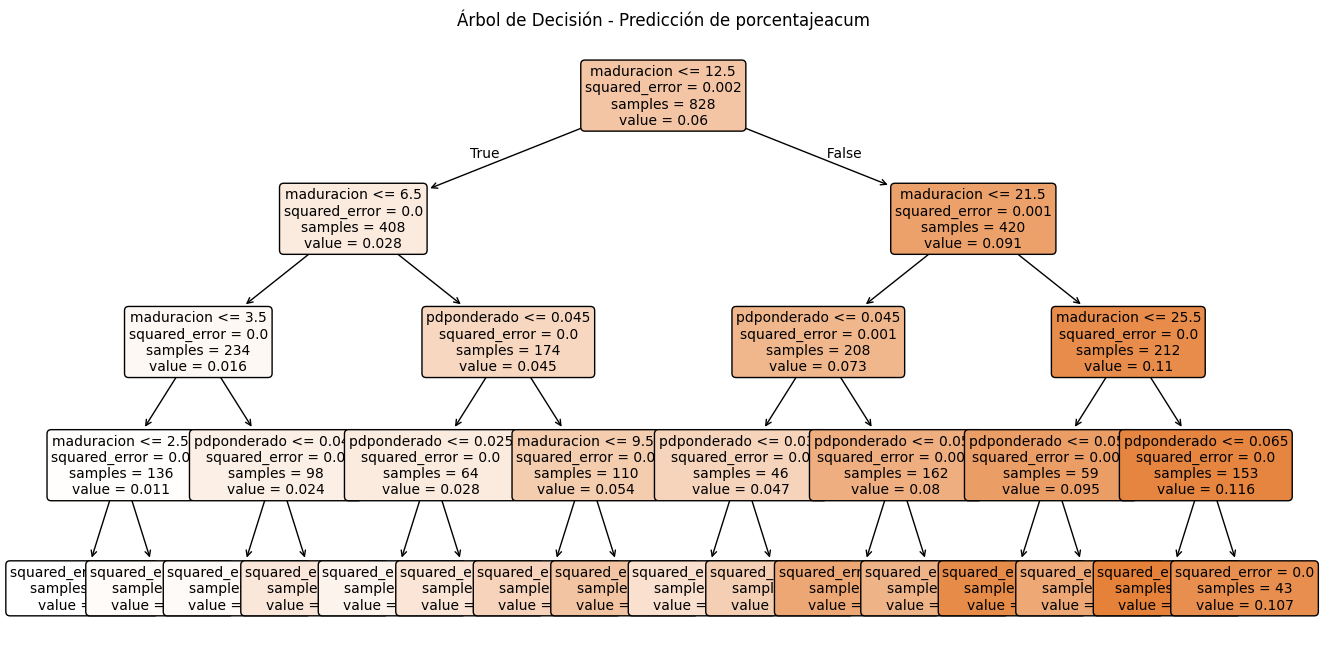

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(
    modelo,
    feature_names=['pdponderado', 'maduracion'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Predicción de porcentajeacum")
plt.show()

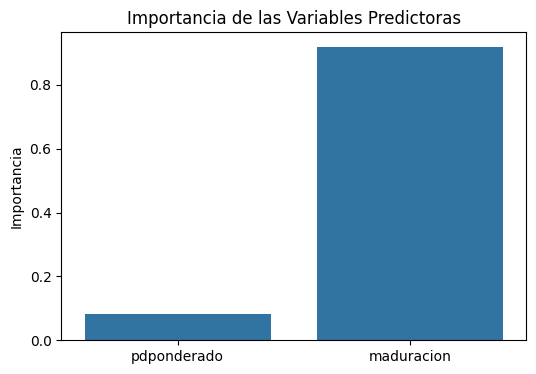

In [ ]:
importancias = modelo.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=['pdponderado', 'maduracion'], y=importancias)
plt.title("Importancia de las Variables Predictoras")
plt.ylabel("Importancia")
plt.show()

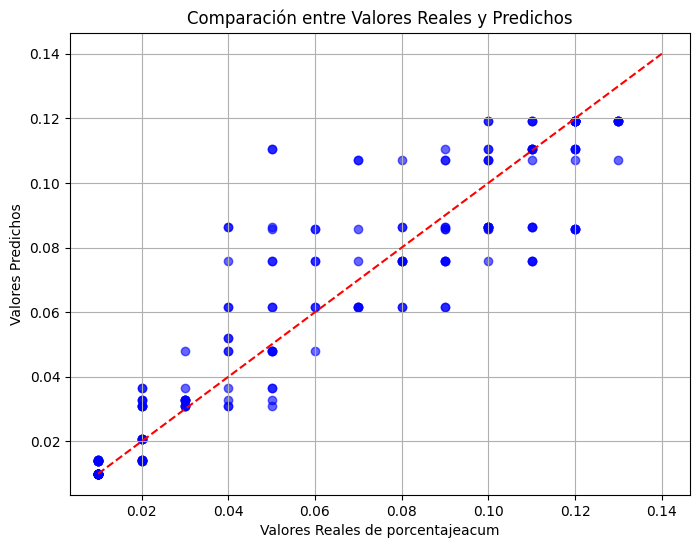

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Valores Reales de porcentajeacum")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos")
plt.grid(True)
plt.show()

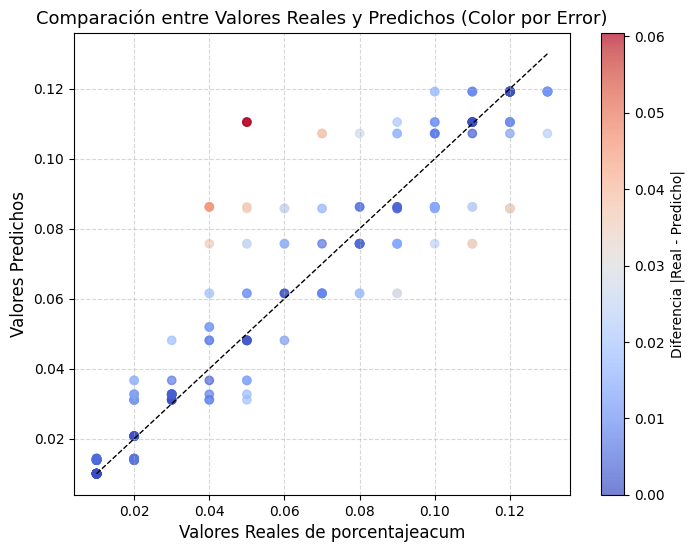

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular la diferencia absoluta
diferencia = np.abs(y_test - y_pred)

plt.figure(figsize=(8, 6))
# Usamos un mapa de color (verde = buena predicción, rojo = error alto)
scatter = plt.scatter(y_test, y_pred, c=diferencia, cmap='coolwarm', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', linewidth=1)

plt.xlabel("Valores Reales de porcentajeacum", fontsize=12)
plt.ylabel("Valores Predichos", fontsize=12)
plt.title("Comparación entre Valores Reales y Predichos (Color por Error)", fontsize=13)
plt.colorbar(scatter, label='Diferencia |Real - Predicho|')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
joblib.dump(modelo, '/content/modelo_arbol_decision.pkl')

['/content/modelo_arbol_decision.pkl']

In [ ]:
modelo_cargado = joblib.load('/content/modelo_arbol_decision.pkl')

In [ ]:
nuevos_datos = pd.DataFrame({
    'pdponderado': [0.04, 0.06, 0.08],
    'maduracion': [3, 5, 7]
})

In [ ]:
nuevas_predicciones = modelo_cargado.predict(nuevos_datos)

print("\n🔮 Nuevas predicciones:")
resultado = pd.concat([nuevos_datos, pd.DataFrame({'Predicción porcentajeacum': nuevas_predicciones})], axis=1)
print(resultado)


🔮 Nuevas predicciones:
   pdponderado  maduracion  Predicción porcentajeacum
0         0.04           3                   0.013871
1         0.06           5                   0.031111
2         0.08           7                   0.048103


In [ ]:
import pandas as pd
import numpy as np

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Crear 100 valores simulados para cada variable
maduracion = np.arange(0, 100)  # Etapas o meses del 0 al 99
pdponderado = np.round(np.random.uniform(0.01, 0.10, 100), 2)  # Valores entre 0.01 y 0.10

# Crear el DataFrame
df_nuevo = pd.DataFrame({
    'pdponderado': pdponderado,
    'maduracion': maduracion

})

In [ ]:
modelo_cargado = joblib.load('/content/modelo_arbol_decision.pkl')

In [ ]:
new_predicction = modelo_cargado.predict(df_nuevo)
result = pd.concat([df_nuevo, pd.DataFrame({'Predicción porcentajeacum': new_predicction})], axis=1)
print(result)

    pdponderado  maduracion  Predicción porcentajeacum
0          0.04           0                   0.010000
1          0.10           1                   0.010000
2          0.08           2                   0.010000
3          0.06           3                   0.013871
4          0.02           4                   0.014318
..          ...         ...                        ...
95         0.05          95                   0.119182
96         0.06          96                   0.119182
97         0.05          97                   0.119182
98         0.01          98                   0.119182
99         0.02          99                   0.119182

[100 rows x 3 columns]
